<a href="https://colab.research.google.com/github/barauna-lo/Computational_Statistics/blob/main/CAP417_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src=https://raw.githubusercontent.com/barauna-lo/CAP4213-Deep-Learning/main/logoinpe.png align=”middle”>](https://www.gov.br/inpe/pt-br)

[<center><img src="https://github.com/barauna-lo/Deep-Learning/blob/main/LogoCAP.png?raw=true" width = 450 align="middle"></center>](http://www.inpe.br/posgraduacao/cap/)


# CAP 417 - PARTE C - HANDS-ON 03


* [Luan Orion Baraúna](https://www.linkedin.com/in/luan-orion-barauna/)


Alternativa: Incorporar aqui o módulo de geração de ST $1/f$ do Hands-On2

Caracterização Espectral de Processos Estocásticos (PSD + DFA  e  MFSS)

# Step 1 

## (CARACTERIZACAO VIA ESPECTRO DE POTÊNCIAS - PSD E DFA): 

Dataframe 1.a. - Série de vento solar com 4096 pontos enviada pelo professor como dataset teste (Sw4096.csv).

Dataframe 1.b. - baixar serie temporal recomendada pelo professor via e-mail.

Aplicar na série 1.b. - o algoritmo **specplus.py** (calcula espectros PSD e DFA). **Antes porém**, para se familiarizar com ambos, rode os algoritmos sobre a série de teste 1.c, Sw4096.csv, enviada pelo email.  

Note que, a versão do 1o algoritmo **specplus.py** se aplica apenas em dados no formato .txt. Dessa forma, está incluido um modulo em python para transformar o arquivo .txt em . csv. (módulo que pode ser útil em futuras aplicações). 

Aplique ambos os algorítmos sobre o Dataframe 1.b. Salve o output. Você pode modificar o código **specplus.py** para ler diretamente o formato .csv (isso vale um bonus de 0.1 na nota final da parte C). 




Bibliotecas e Comandos Necessários:

In [2]:
!pip install colorednoise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm
import io
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
#import colorednoise as cn
from matplotlib.pyplot import figure
#%matplotlib inline

#Cloning Computational Statistics Repository
#!git clone 'https://github.com/barauna-lo/Computational_Statistics.git' 



In [2]:
%cd Computational_Statistics/ 

/content/Computational_Statistics


In [3]:
import SpecplusV02 as specplus #import function
import MFDFA as mfdfa
# #Get out of the folders
% cd ..

/content


## Generating Time Series
Here I will generate all classes of times series that we have beem work on the last Hands On. The main functions that we use for genetare `pmodel` was insert in the `SpecplusV02.py` code. That will get this notebook quitely clean and also help me to learn how to use subroutines and build my privet librays  

In [5]:
#Alternativa 
# GERANDO SÉRIES TEMPORAIS DE RUÍDOS COLORIDOS
colorData = pd.DataFrame()
#SetUp a noise class
beta,dataSize = [0.2,1,2],len_size 
#beta,dataSize = [0,1,2],2**10
#Creat dataSize
for i in range(len(beta)): colorData.insert(i,'beta'+str(i),cn.powerlaw_psd_gaussian(beta[i],dataSize))#,random_state=8666)) #insert new collums
df = colorData

## Ploting all Data Series
Lets take a look on the data

## Times Series FROM FRB

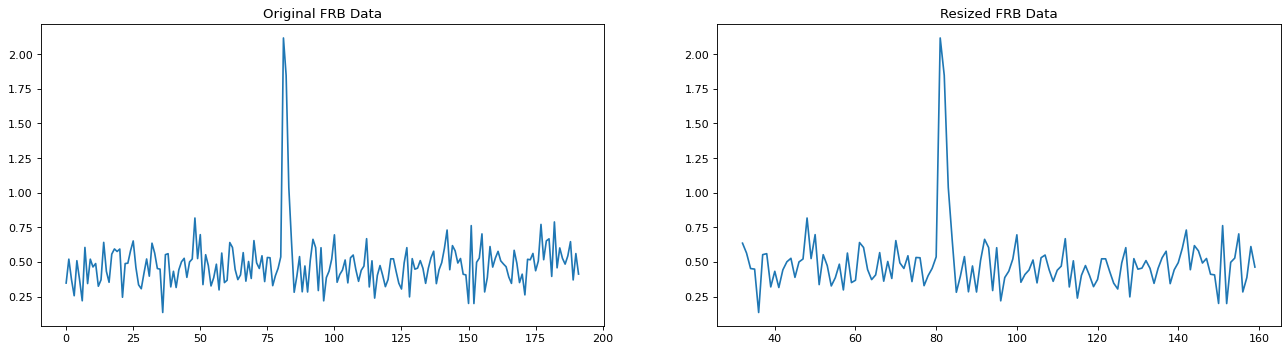

In [52]:
#download data
#!gdown "https://www.cadc-ccda.hia-iha.nrc-cnrc.gc.ca/files/vault/AstroDataCitationDOI/CISTI.CANFAR/21.0007/data/waterfalls/data/FRB20180725A_waterfall.h5"

import h5py
file_name = "FRB20180725A_waterfall.h5"
data = h5py.File(file_name, "r")

import numpy as np
data = data["frb"]
cal_wfall =  data["calibrated_wfall"][:]
cal_ts = np.nanmean(cal_wfall, axis = 0)
df = pd.DataFrame()
df.insert(0,'cal_ts',cal_ts)

figure(figsize=(20,5),dpi=80)
plt.subplot(1,2,1) 
plt.plot(df)
plt.title('Original FRB Data')
plt.subplot(1,2,2)
df = df[32:-32] #Resizing the Time series for a 2**7 
plt.plot(df)
plt.title('Resized FRB Data')
plt.show()

Importação das Séries Temporais para este notebook:

# Task 01: 
Calcular $\gamma_1$

$$ \gamma_1 = \frac{2}{7} (\bar{\alpha}-\beta) $$


In [53]:
#df = df_FRB
#columns = df.columns #Extracting colluns names
columns = ['cal_ts']
gamma1 = []
for i in range(len(columns)): 
    gamma1.append(specplus.gamma1(df[columns[i]])[2])
    print("γ1 de "+columns[i]+" = ",round(specplus.gamma1(df[columns[i]])[2],5))

γ1 de cal_ts =  0.81969


# STEP 02:
CARACTERIZAÇÃO VIA ESPECTRO MULTIFRACTAL

Algoritmo MFDFA.py (com 5 módulos separados) para obtenção do espectro multifractal de singularidade (deve ser aplicado sobre o formato .csv).

Para fins de familiarização, rode o algoritmo primeiramente sobre o dataframe 1 e obtenha o valor de Delta_Alpha=dalpha) ~  0.87.

Aplique sobre o dataframe 1.b e obtenha o valor de dalpha. Compare com o dalpha aplicado sobre o dataframe 1.a e verifique qual tem maior multifractalidade (maior dalpha).


# Multifractal Singularity Spectra (MFSS) 

via MFDFA.py (Módulos A, B, C, D e E)



# Task 02: 
Calcular $\gamma_2$



---



In [54]:
import MFDFA as mfdfa

gamma2,dalpha = [],[]
for i in range(len(columns)): 
    gamma2.append(mfdfa.gamma2(df[columns[i]])[0])
    dalpha.append(mfdfa.gamma2(df[columns[i]])[1])
    print(columns[i]+' - Δα %g, γ2 %g' % (mfdfa.gamma2(df[columns[i]])[1] ,mfdfa.gamma2(df[columns[i]])[0]))
    #print("γ1 de "+columns[i]+" = ",round(specplus.gamma1(df[columns[i]])[2],5))


cal_ts - Δα 0.985364, γ2 0.656909


# Task 03:

Janelamento + plotagem gamma 1 x gamma 2.



---



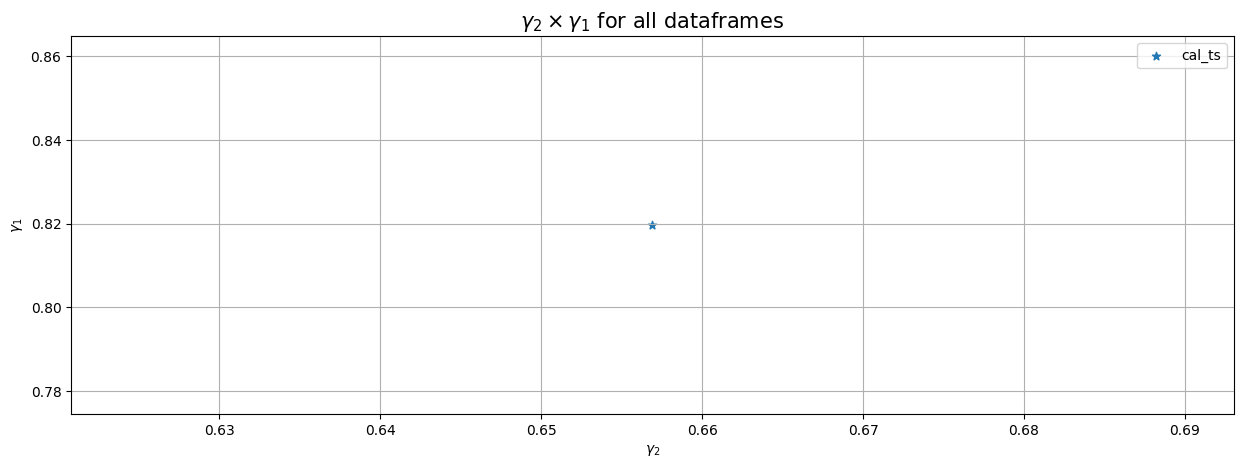

In [58]:
figure(figsize=(15,5),dpi=100)
cor = ['C0','C1','C2','C3','C4','C5','C6','C7']
markers = ['*','*','*','o','o','o','o','o',]
for i in range(len(columns)):
    plt.scatter(gamma2[i],gamma1[i],label=columns[i],color='C'+str(i),marker=markers[i])
plt.legend()
plt.grid()
plt.xlabel(r'$\gamma_2$')
plt.ylabel(r'$\gamma_1$')
plt.title(r'$\gamma_2 \times \gamma_1$ for all dataframes',size=15)
plt.show()

## Janelamento

Para realizarmos o _"Janelamento"_ iremos dividir nossa série temporal 4 partes. Então calcularemos os valores de $\gamma_1$ e $\gamma_2$ para cada janeja daquela série temporal

In [64]:
len(df)/4

32.0

In [59]:
# PRECISA SER AUTOMATIZADO
window = int(len(df)/4)
# splitting dataframe by row index
df_1 = df.iloc[:window,:]
df_2 = df.iloc[window:2*window,:]
df_3 = df.iloc[2*window:3*window,:]
df_4 = df.iloc[3*window:,:]
print("Shape of new dataframes - {} , {}".format(df_1.shape, df_2.shape))

#Alocating new gamma1 and gamma2
gamma1_win1,gamma1_win2,gamma1_win3,gamma1_win4= [],[],[],[]
gamma2_win1,gamma2_win2,gamma2_win3,gamma2_win4 = [] , [] , [] , []
dalpha_win1,dalpha_win2,dalpha_win3,dalpha_win4 = [] , [] , [] , []
for i in range(len(columns)): 
    gamma1_win1.append(specplus.gamma1(df_1[columns[i]])[2])
    gamma1_win2.append(specplus.gamma1(df_2[columns[i]])[2])
    gamma1_win3.append(specplus.gamma1(df_3[columns[i]])[2])
    gamma1_win4.append(specplus.gamma1(df_4[columns[i]])[2])
    
    gamma2_win1.append(mfdfa.gamma2(df_1[columns[i]])[0])
    gamma2_win2.append(mfdfa.gamma2(df_2[columns[i]])[0])
    gamma2_win3.append(mfdfa.gamma2(df_3[columns[i]])[0])
    gamma2_win4.append(mfdfa.gamma2(df_4[columns[i]])[0])



Shape of new dataframes - (32, 1) , (32, 1)


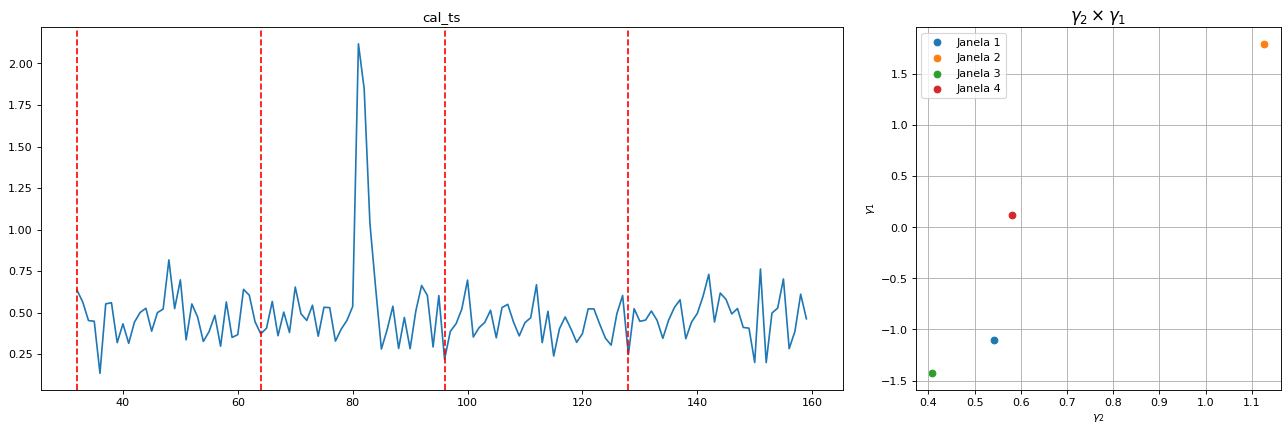

In [67]:
char_lines = len(columns)
char_colum = 3
figure(figsize=(20,6*char_lines),dpi=80)

#i=0
for i in range(char_lines):
    plt.subplot(char_lines,char_colum,((3*i+1,3*i+2)))
    plt.plot(df[columns[i]],color=cor[i])
    plt.axvline(x=window,color='red',linestyle='--')
    plt.axvline(x=2*window,color='red',linestyle='--')
    plt.axvline(x=3*window,color='red',linestyle='--')
    plt.axvline(x=4*window,color='red',linestyle='--')
    plt.title(columns[i])

    plt.subplot(char_lines,char_colum,(3*(i+1)))
    plt.scatter(gamma2_win1[i],gamma1_win1[i],label='Janela 1')
    plt.scatter(gamma2_win2[i],gamma1_win2[i],label='Janela 2')
    plt.scatter(gamma2_win3[i],gamma1_win3[i],label='Janela 3')
    plt.scatter(gamma2_win4[i],gamma1_win4[i],label='Janela 4')
    plt.title(columns[i])
    plt.grid()
    plt.legend()
    plt.xlabel(r'$\gamma_2$')
    plt.ylabel(r'$\gamma_1$')
    plt.title(r'$\gamma_2 \times \gamma_1$',size=15)
    #plt.xlim(-0.2,1.1)
    #plt.ylim(-0.2,1.1)

#plt.suptitle(r'$\gamma_2 \times \gamma_1$ for each time series window',size=30)  
plt.show()





---



# Task Extra 
Complet Data Analyse for all tools allready used


Data Analysis for 3DBMO simulations...

Original time series data (128 points): 

First 10 points: [0.63544273 0.56383425 0.45228192 0.44813287 0.13469727 0.5525893
 0.5595715  0.31945273 0.4323778  0.31518376]


1. Plotting time series data...
2. Plotting Power Spectrum Density...  beta =-2.021365521054599


IndexError: ignored

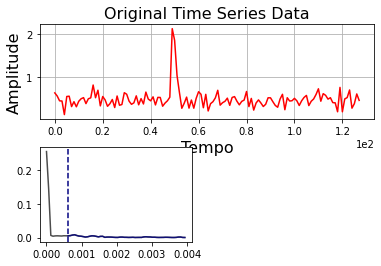

In [69]:

i=0
dx = df[columns[i]]
specplus.main(dx,columns[i])

[timeMeasure, meanDataMeasure, scales] = mfdfa.getHurstByUpscaling(dx)                    # Set of parameters No. 1
#[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2
[bScale, bDM, bsIndex, HMajor, HMinor] = mfdfa.getScalingExponents(timeMeasure, meanDataMeasure)
# Modified first-order MF-DFA
[_, dataMeasure, _, stats, q] = mfdfa.getMSSByUpscaling(dx, isNormalised = 1)


# Modified first-order DFA
[timeMeasure, meanDataMeasure, scales] = mfdfa.getHurstByUpscaling(dx)                    # Set of parameters No. 1
#[timeMeasure, meanDataMeasure, scales] = getHurstByUpscaling(dx, 3.0, 0, 2.0)       # Set of parameters No. 2

[bScale, bDM, bsIndex, HMajor, HMinor] = mfdfa.getScalingExponents(timeMeasure, meanDataMeasure)


# Output
# Modified first-order DFA
figure(figsize=(25,15),dpi=80)
plt.subplot(3, 2, 1)
plt.loglog(timeMeasure, meanDataMeasure, 'ko-')
plt.xlabel(r'$\mu(t)$')
plt.ylabel(r'$\mu(\Delta x)$')
plt.grid('on', which = 'minor')
plt.title('Modified First-Order DFA of a Multifractal Noise')

plt.subplot(3, 2, 2)
plt.loglog(scales, meanDataMeasure, 'ko-')
plt.loglog(bScale, bDM, 'ro')
plt.xlabel(r'$j$')
plt.ylabel(r'$\mu(\Delta x)$')
plt.grid('on', which = 'minor')

# Modified first-order MF-DFA

plt.subplot(3, 2, 3)
nq = np.int(len(q))
leg_txt = []
for qi in range(1, nq + 1):
    llh = plt.loglog(scales, dataMeasure[qi - 1, :], 'o-')
    leg_txt.append('tau = %g (q = %g)' % (stats['tau'][qi - 1], q[qi - 1]))
plt.xlabel(r'$j$')
plt.ylabel(r'$\mu(\Delta x, q)$')
plt.grid('on', which = 'minor')
plt.title('Modified First-Order MF-DFA of a Multifractal Noise')
#plt.legend(leg_txt)


plt.subplot(3, 2, 4)
plt.plot(q, stats['tau'], 'ko-')
plt.xlabel(r'$q$')
plt.ylabel(r'$\tau(q)$')
plt.grid('on', which = 'major')
plt.title('Statistics of Modified First-Order MF-DFA of a Multifractal Noise')


plt.subplot(3, 2, 5)
plt.plot(stats['LH'], stats['f'], 'ko-')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$f(\alpha)$')
# plt.grid('on', which = 'major')

plt.subplot(3, 2, 6)
sns.distplot(dx, bins=40, hist_kws={'edgecolor':'black'})
plt.ylabel('Frequency of A per bin')
plt.xlabel('Blue Bins')
plt.title('Kenal Density Function for '+columns[i])
#specplus.cullenfreyGEV(dx)


plt.show()

#PRINTING SPECTRUM PARAMETERS
print('alpha_min = %g, alpha_max = %g, dalpha = %g' % (stats['LH_min'], stats['LH_max'], stats['LH_max'] - stats['LH_min']))
print('h_min = %g, h_max = %g, dh = %g\n' % (stats['h_min'], stats['h_max'], stats['h_max'] - stats['h_min']))






---

